# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
stock_prices = pd.read_csv('data/stock_prices_20230914.csv')
transactions_one = pd.read_csv('data/transactions_20230914.csv')
transactions_two = pd.read_csv('data/transactions_20230924.csv')

## Profiling

### Check characteristics of each dataset

### Stock Prices

In [3]:
stock_prices.head()

,symbol,date,open,high,low,close,volume,adjusted
0,BP,2020-01-02,38.040001,38.150002,37.869999,38.139999,6565100.0,31.165506
1,BP,2020-01-03,38.480000,39.090000,38.459999,38.830002,14000800.0,31.729324
2,BP,2020-01-06,39.680000,40.080002,39.660000,39.849998,15091700.0,32.562805
3,BP,2020-01-07,39.360001,39.480000,39.000000,39.430000,12494200.0,32.219612
4,BP,2020-01-08,39.240002,39.299999,38.590000,38.830002,9335500.0,31.729324


In [4]:
stock_prices['date'] = pd.to_datetime(stock_prices['date'])
min(stock_prices['date']), max(stock_prices['date'])

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-08-31 00:00:00'))

In [5]:
stock_prices.shape

(1429554, 8)

In [6]:
#Check null values
(100*stock_prices.isnull().sum()/stock_prices.shape[0]).sort_values(ascending = False)

symbol      0.0
date        0.0
open        0.0
high        0.0
low         0.0
close       0.0
volume      0.0
adjusted    0.0
dtype: float64

### Stock Prices Attribute Characteristics

In [7]:
for col in list(stock_prices.columns):
    string = 'Profile of the '+col+' column'
    print(string)
    print(stock_prices[col].value_counts())
    print("Percentage of null values ", 100*stock_prices[col].isnull().sum()/stock_prices[col].shape[0])
    print(" ")
    print(" ")
    print(" ")

Profile of the symbol column
BP      923
IGT     923
HPP     923
SJT     923
NEWT    923
       ... 
BAM     188
GEHC    178
BMR     129
CR      108
DBD      14
Name: symbol, Length: 1579, dtype: int64
Percentage of null values  0.0
 
 
 
Profile of the date column
2023-08-31    1579
2023-08-22    1579
2023-08-14    1579
2023-08-15    1579
2023-08-17    1579
              ... 
2020-01-23    1486
2020-01-24    1486
2020-01-27    1486
2020-01-28    1486
2020-01-02    1486
Name: date, Length: 923, dtype: int64
Percentage of null values  0.0
 
 
 
Profile of the open column
30.000000     525
25.000000     522
40.000000     504
15.000000     503
10.000000     495
             ... 
629.809998      1
627.309998      1
626.539978      1
623.349976      1
0.894000        1
Name: open, Length: 101104, dtype: int64
Percentage of null values  0.0
 
 
 
Profile of the high column
20.000000     333
10.000000     330
17.000000     325
11.000000     315
16.000000     314
             ... 
348.200012  

### Transactions Dataset One

In [8]:
transactions_one.head()

,disclosure_date,transaction_date,owner,member,member_type,amount_formatted,type,ticker,industry,sector,...,asset_type,comment,adjusted,market.cap,country,ipo.year,short_term.avg_per_change,short_term.sd_per_change,med_term.avg_per_change,med_term.sd_per_change
0,05/10/2023,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.840662e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
1,05/10/2023,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.840662e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
2,05/07/2023,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,sale_full,CSCO,Computer Communications Equipment,Technology,...,NaN,NaN,46.229439,2.285723e+11,United States,1990.0,0.000536,0.030787,0.098959,0.041097
3,05/07/2023,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,purchase,XOM,Integrated oil Companies,Energy,...,NaN,NaN,113.713020,4.744584e+11,United States,NaN,-0.078681,0.020198,-0.077247,0.022886
4,05/12/2023,2023-04-20,joint,Susie Lee,representative,15000.0,sale_full,AJG,Specialty Insurers,Finance,...,NaN,NaN,206.815323,4.987886e+10,United States,NaN,0.036098,0.029300,0.061753,0.033477


In [9]:
transactions_one.shape

(11531, 33)

In [10]:
#Check null values
(100*transactions_one.isnull().sum()/transactions_one.shape[0]).sort_values(ascending = False)

asset_type                   100.000000
comment                      100.000000
ipo.year                      53.343162
owner                         39.606279
sector                         5.923164
industry                       0.823866
party                          0.641748
country                        0.537681
adjusted                       0.000000
ptr_link                       0.000000
cap_gains_over_200_usd         0.000000
disclosure_date                0.000000
market.cap                     0.000000
district                       0.000000
short_term.avg_per_change      0.000000
short_term.sd_per_change       0.000000
med_term.avg_per_change        0.000000
state                          0.000000
asset_description              0.000000
amount                         0.000000
transaction_date               0.000000
volume                         0.000000
close                          0.000000
low                            0.000000
high                           0.000000


In [11]:
transactions_one['disclosure_date'] = pd.to_datetime(transactions_one['disclosure_date'])
min(transactions_one['disclosure_date']), max(transactions_one['disclosure_date'])

(Timestamp('2020-01-06 00:00:00'), Timestamp('2023-05-14 00:00:00'))

In [12]:
transactions_one['transaction_date'] = pd.to_datetime(transactions_one['transaction_date'])
min(transactions_one['transaction_date']), max(transactions_one['transaction_date'])

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-05-03 00:00:00'))

### Transactions One Attribute Characteristics

In [13]:
for col in list(transactions_one.columns):
    string = 'Profile of the '+col+' column'
    print(string)
    print(transactions_one[col].value_counts())
    print("Percentage of null values ", 100*transactions_one[col].isnull().sum()/transactions_one[col].shape[0])
    print(" ")
    print(" ")

Profile of the disclosure_date column
2020-04-16    241
2021-03-16    151
2020-06-15    141
2020-05-07    127
2021-03-12    118
             ... 
2021-12-14      1
2021-11-23      1
2021-12-16      1
2020-07-03      1
2021-07-28      1
Name: disclosure_date, Length: 749, dtype: int64
Percentage of null values  0.0
 
 
Profile of the transaction_date column
2020-03-18    195
2021-02-16    169
2020-04-02    114
2020-02-20    113
2021-02-11    103
             ... 
2022-11-25      1
2022-09-02      1
2022-03-28      1
2020-10-12      1
2022-07-01      1
Name: transaction_date, Length: 809, dtype: int64
Percentage of null values  0.0
 
 
Profile of the owner column
joint        3840
self         2276
--            563
dependent     285
Name: owner, dtype: int64
Percentage of null values  39.60627872691007
 
 
Profile of the member column
Josh Gottheimer           1215
Gilbert Cisneros           630
Susie Lee                  605
Alan S. Lowenthal          480
Lois Frankel               445

### Transactions Dataset Two

In [14]:
transactions_two.head()

,disclosure_date,transaction_date,owner,member,member_type,amount_formatted,type,ticker,industry,sector,...,asset_type,comment,adjusted,market.cap,country,ipo.year,short_term.avg_per_change,short_term.sd_per_change,med_term.avg_per_change,med_term.sd_per_change
0,05/10/2023,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
1,05/10/2023,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
2,05/07/2023,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,sale_full,CSCO,Computer Communications Equipment,Technology,...,NaN,NaN,46.229439,2.172187e+11,United States,1990.0,0.000536,0.030787,0.098959,0.041097
3,05/07/2023,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,purchase,XOM,Oil & Gas Production,Energy,...,NaN,NaN,113.713020,4.601270e+11,United States,NaN,-0.078681,0.020198,-0.077247,0.022886
4,05/12/2023,2023-04-20,joint,Susie Lee,representative,15000.0,sale_full,AJG,Specialty Insurers,Finance,...,NaN,NaN,206.815323,5.023014e+10,United States,NaN,0.036098,0.029300,0.061753,0.033477


In [15]:
transactions_two.shape

(12300, 33)

In [16]:
#Check null values
(100*transactions_two.isnull().sum()/transactions_two.shape[0]).sort_values(ascending = False)

asset_type                   100.000000
comment                      100.000000
ipo.year                      53.463415
owner                         38.747967
sector                         5.991870
industry                       0.642276
party                          0.601626
country                        0.512195
adjusted                       0.000000
ptr_link                       0.000000
cap_gains_over_200_usd         0.000000
disclosure_date                0.000000
market.cap                     0.000000
district                       0.000000
short_term.avg_per_change      0.000000
short_term.sd_per_change       0.000000
med_term.avg_per_change        0.000000
state                          0.000000
asset_description              0.000000
amount                         0.000000
transaction_date               0.000000
volume                         0.000000
close                          0.000000
low                            0.000000
high                           0.000000


In [17]:
transactions_two['disclosure_date'] = pd.to_datetime(transactions_two['disclosure_date'])
min(transactions_two['disclosure_date']), max(transactions_two['disclosure_date'])

(Timestamp('2020-01-02 00:00:00'), Timestamp('2023-05-14 00:00:00'))

In [18]:
transactions_two['transaction_date'] = pd.to_datetime(transactions_two['transaction_date'])
min(transactions_two['transaction_date']), max(transactions_two['transaction_date'])

(Timestamp('2017-09-05 00:00:00'), Timestamp('2023-05-03 00:00:00'))

### Transactions Two Attribute Characteristics

In [19]:
for col in list(transactions_two.columns):
    string = 'Profile of the '+col+' column'
    print(string)
    print(transactions_two[col].value_counts())
    print("Percentage of null values ", 100*transactions_two[col].isnull().sum()/transactions_two[col].shape[0])
    print(" ")
    print(" ")

Profile of the disclosure_date column
2020-04-27    413
2020-04-16    241
2021-03-16    151
2020-06-15    141
2021-10-08    140
             ... 
2021-11-23      1
2021-12-16      1
2021-12-06      1
2021-10-20      1
2020-07-30      1
Name: disclosure_date, Length: 758, dtype: int64
Percentage of null values  0.0
 
 
Profile of the transaction_date column
2020-03-18    195
2021-02-16    169
2019-06-24    142
2020-04-02    114
2020-02-20    113
             ... 
2022-07-01      1
2019-05-22      1
2019-11-11      1
2019-11-05      1
2017-09-05      1
Name: transaction_date, Length: 932, dtype: int64
Percentage of null values  0.0
 
 
Profile of the owner column
joint        3905
self         2364
--            965
dependent     300
Name: owner, dtype: int64
Percentage of null values  38.7479674796748
 
 
Profile of the member column
Josh Gottheimer         1240
Gilbert Cisneros         680
Susie Lee                605
Alan S. Lowenthal        482
Lois Frankel             450
          

## EDA: Cohort Level Insights
### The cohort level insights are derived from the transactions data

In [20]:
print(transactions_two.columns)

Index(['disclosure_date', 'transaction_date', 'owner', 'member', 'member_type',
       'amount_formatted', 'type', 'ticker', 'industry', 'sector',
       'shares_purchased', 'open', 'high', 'low', 'close', 'volume',
       'asset_description', 'amount', 'district', 'state', 'ptr_link',
       'cap_gains_over_200_usd', 'party', 'asset_type', 'comment', 'adjusted',
       'market.cap', 'country', 'ipo.year', 'short_term.avg_per_change',
       'short_term.sd_per_change', 'med_term.avg_per_change',
       'med_term.sd_per_change'],
      dtype='object')


In [21]:
transactions_two.head()

,disclosure_date,transaction_date,owner,member,member_type,amount_formatted,type,ticker,industry,sector,...,asset_type,comment,adjusted,market.cap,country,ipo.year,short_term.avg_per_change,short_term.sd_per_change,med_term.avg_per_change,med_term.sd_per_change
0,2023-05-10,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
1,2023-05-10,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745
2,2023-05-07,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,sale_full,CSCO,Computer Communications Equipment,Technology,...,NaN,NaN,46.229439,2.172187e+11,United States,1990.0,0.000536,0.030787,0.098959,0.041097
3,2023-05-07,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,purchase,XOM,Oil & Gas Production,Energy,...,NaN,NaN,113.713020,4.601270e+11,United States,NaN,-0.078681,0.020198,-0.077247,0.022886
4,2023-05-12,2023-04-20,joint,Susie Lee,representative,15000.0,sale_full,AJG,Specialty Insurers,Finance,...,NaN,NaN,206.815323,5.023014e+10,United States,NaN,0.036098,0.029300,0.061753,0.033477


In [22]:
transactions_two['type'].value_counts()

purchase        6302
sale_full       3849
sale_partial    2083
exchange          65
sale               1
Name: type, dtype: int64

In [23]:
transactions_two['sector'].isnull().sum()/len(transactions_two)

0.05991869918699187

## Member Level EDA

### Volume and Percentage % Breakdown of Transactions Count by Member

In [24]:
volume_and_percentage_per_member = transactions_two['member'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Member',
    'member': 'Transactions Count'
})
volume_and_percentage_per_member['Percentage % Composition'] = 100*volume_and_percentage_per_member['Transactions Count']/volume_and_percentage_per_member['Transactions Count'].sum()
top_ten_per_members = volume_and_percentage_per_member.iloc[0:20, :]
top_ten_per_members

,Member,Transactions Count,Percentage % Composition
0,Josh Gottheimer,1240,10.081301
1,Gilbert Cisneros,680,5.528455
2,Susie Lee,605,4.918699
3,Alan S. Lowenthal,482,3.918699
4,Lois Frankel,450,3.658537
5,Kevin Hern,426,3.463415
6,"Donald S. Beyer, Jr.",426,3.463415
7,Mark E. Green,402,3.268293
8,Donna Shalala,399,3.243902
9,Dean Phillips,387,3.146341


Text(0.5, 1.0, 'Top twenty congressional members that transacted the most from 2017-09-05 to 2023-05-03')

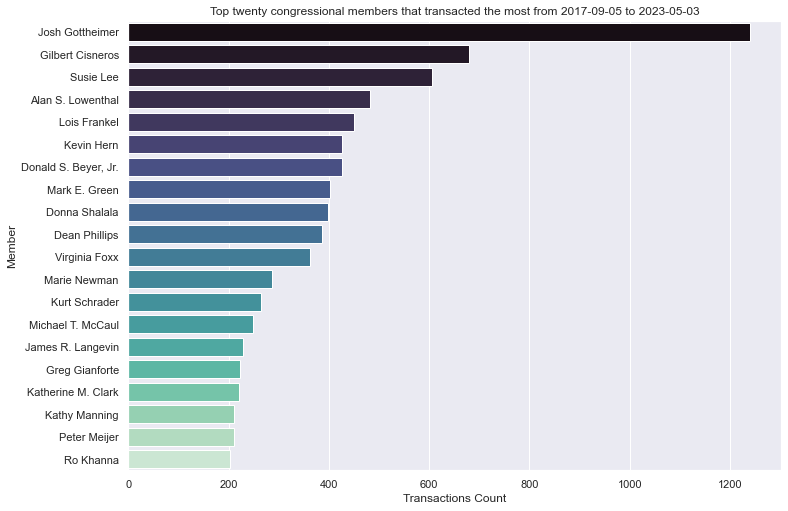

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Transactions Count', y = 'Member', data = top_ten_per_members, palette = 'mako')
plt.title('Top twenty congressional members that transacted the most from 2017-09-05 to 2023-05-03')

### Volume and Percentage % Breakdown of Transactions Count by Transaction Type and Member

In [26]:
transactions_two['type'].value_counts()

purchase        6302
sale_full       3849
sale_partial    2083
exchange          65
sale               1
Name: type, dtype: int64

In [27]:
transactions_two['type_higher_gran'] = transactions_two['type'].apply(lambda x: 'Purchase' if x == 'purchase' else 'Sale')
transactions_two['type_higher_gran'].value_counts()

Purchase    6302
Sale        5998
Name: type_higher_gran, dtype: int64

In [28]:
volume_and_percentage_per_member_and_ttype = transactions_two[['member', 'type_higher_gran']]
volume_and_percentage_per_member_and_ttype['Transactions Count'] = 1
volume_and_percentage_per_member_and_ttype = volume_and_percentage_per_member_and_ttype.groupby(['member', 'type_higher_gran'], as_index = False)
volume_and_percentage_per_member_and_ttype = volume_and_percentage_per_member_and_ttype.agg(sum)
volume_and_percentage_per_member_and_ttype = volume_and_percentage_per_member_and_ttype.merge(top_ten_per_members, how = 'inner', left_on = 'member', right_on = 'Member')
volume_and_percentage_per_member_and_ttype = volume_and_percentage_per_member_and_ttype.sort_values('Transactions Count_y', ascending = False). drop(columns = ['Transactions Count_y', 'Percentage % Composition'])
volume_and_percentage_per_member_and_ttype = volume_and_percentage_per_member_and_ttype.rename(columns = {
    'type_higher_gran': 'Transaction Type',
    'Transactions Count_x': 'Transactions Count'
})
volume_and_percentage_per_member_and_ttype.head()

/var/folders/pm/4_sx8tgs6j91b49hvjnrs7cr0000gn/T/ipykernel_1021/3345248268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_and_percentage_per_member_and_ttype['Transactions Count'] = 1


,member,Transaction Type,Transactions Count,Member
14,Josh Gottheimer,Purchase,547,Josh Gottheimer
15,Josh Gottheimer,Sale,693,Josh Gottheimer
8,Gilbert Cisneros,Purchase,367,Gilbert Cisneros
9,Gilbert Cisneros,Sale,313,Gilbert Cisneros
37,Susie Lee,Sale,310,Susie Lee


Text(0.5, 1.0, 'Top twenty congressional members that transacted the most (partitioned by transaction type) from 2017-09-05 to 2023-05-03')

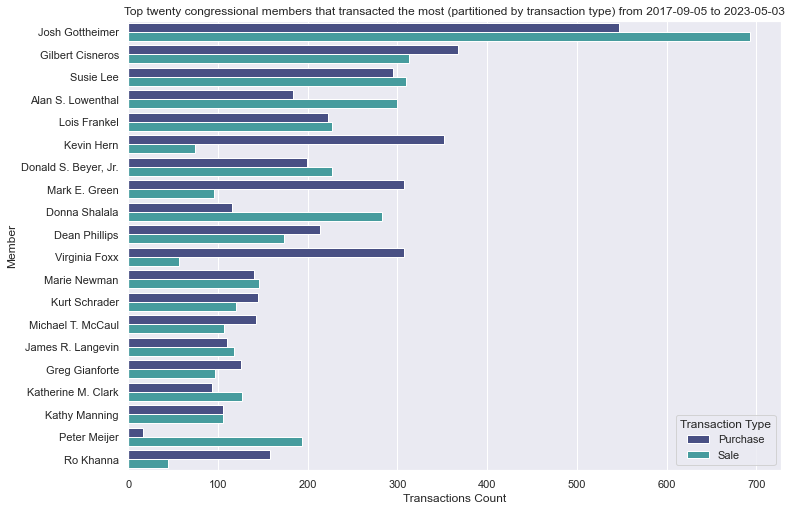

In [29]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Transactions Count', 
            y = 'Member',
            hue = 'Transaction Type',
            data = volume_and_percentage_per_member_and_ttype,
            palette = 'mako', alpha = 1)
plt.title('Top twenty congressional members that transacted the most (partitioned by transaction type) from 2017-09-05 to 2023-05-03')

### Volume and Percentage % Breakdown of Purchases Count by Member

In [30]:
purchases_volume_and_percentage_per_member = transactions_two[transactions_two['type_higher_gran'] == 'Purchase']['member'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Member',
    'member': 'Purchase Transactions Count'
})
purchases_volume_and_percentage_per_member['Percentage % Composition'] = 100*purchases_volume_and_percentage_per_member['Purchase Transactions Count']/purchases_volume_and_percentage_per_member['Purchase Transactions Count'].sum()
top_ten_per_members_purchases = purchases_volume_and_percentage_per_member.iloc[0:20, :]
top_ten_per_members_purchases


,Member,Purchase Transactions Count,Percentage % Composition
0,Josh Gottheimer,547,8.679784
1,Gilbert Cisneros,367,5.823548
2,Kevin Hern,352,5.585528
3,Mark E. Green,307,4.871469
4,Virginia Foxx,307,4.871469
5,Susie Lee,295,4.681054
6,Lois Frankel,223,3.538559
7,Dean Phillips,214,3.395747
8,"Donald S. Beyer, Jr.",199,3.157728
9,Alan S. Lowenthal,183,2.903840


Text(0.5, 1.0, 'Top twenty congressional members that made the most purchase transactions from 2017-09-05 to 2023-05-03')

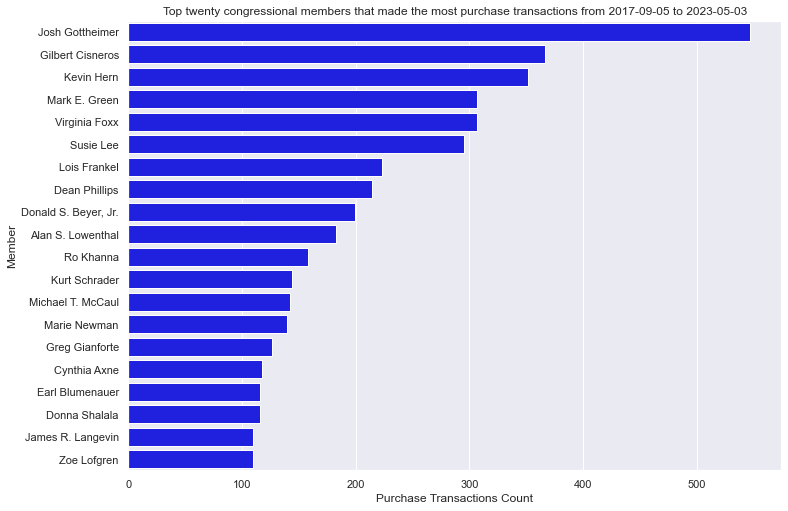

In [31]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Purchase Transactions Count', y = 'Member', data = top_ten_per_members_purchases, color = 'Blue')
plt.title('Top twenty congressional members that made the most purchase transactions from 2017-09-05 to 2023-05-03')

### Volume and Percentage % Breakdown of Sales Count by Member

In [32]:
sales_volume_and_percentage_per_member = transactions_two[transactions_two['type_higher_gran'] == 'Sale']['member'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Member',
    'member': 'Sales Transactions Count'
})
sales_volume_and_percentage_per_member['Percentage % Composition'] = 100*sales_volume_and_percentage_per_member['Sales Transactions Count']/sales_volume_and_percentage_per_member['Sales Transactions Count'].sum()
top_ten_per_members_sales = sales_volume_and_percentage_per_member.iloc[0:20, :]
top_ten_per_members_sales

,Member,Sales Transactions Count,Percentage % Composition
0,Josh Gottheimer,693,11.553851
1,Gilbert Cisneros,313,5.218406
2,Susie Lee,310,5.168389
3,Alan S. Lowenthal,299,4.984995
4,Donna Shalala,283,4.718239
5,Lois Frankel,227,3.784595
6,"Donald S. Beyer, Jr.",227,3.784595
7,Peter Meijer,194,3.234411
8,Dean Phillips,173,2.884295
9,Marie Newman,146,2.434145


Text(0.5, 1.0, 'Top twenty congressional members that made the most sales transactions the most from 2017-09-05 to 2023-05-03')

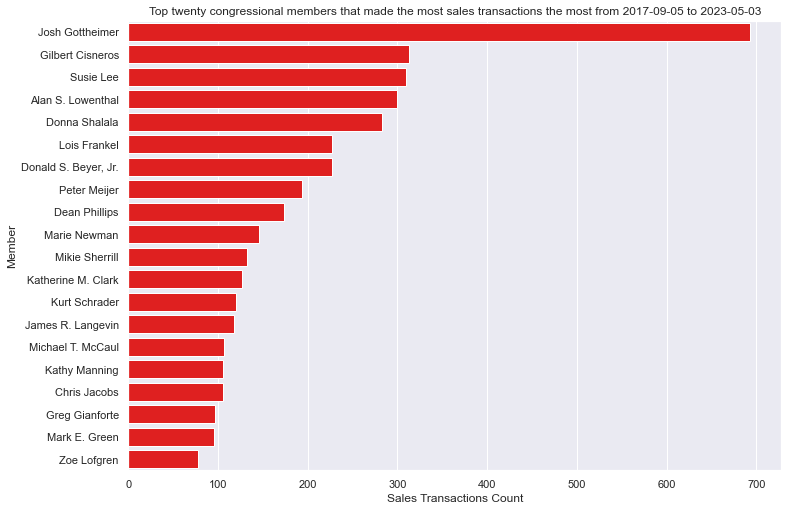

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Sales Transactions Count', y = 'Member', data = top_ten_per_members_sales, color = 'Red')
plt.title('Top twenty congressional members that made the most sales transactions the most from 2017-09-05 to 2023-05-03')

### Average Approximate Purchase Transaction Price by Member

In [34]:
avg_purchase_transaction_price_by_member = transactions_two[transactions_two['type_higher_gran'] == 'Purchase']
avg_purchase_transaction_price_by_member = avg_purchase_transaction_price_by_member[['member', 'amount_formatted']].groupby('member', as_index = False).agg(np.mean).sort_values('amount_formatted', ascending = False)
top_ten_avg_purchase_transaction_price_by_member = avg_purchase_transaction_price_by_member.iloc[0:20, :]
top_ten_avg_purchase_transaction_price_by_member['amount_formatted'] = top_ten_avg_purchase_transaction_price_by_member['amount_formatted'].astype(int)
top_ten_avg_purchase_transaction_price_by_member


/var/folders/pm/4_sx8tgs6j91b49hvjnrs7cr0000gn/T/ipykernel_1021/1040576456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_avg_purchase_transaction_price_by_member['amount_formatted'] = top_ten_avg_purchase_transaction_price_by_member['amount_formatted'].astype(int)


,member,amount_formatted
109,Suzan K. DelBene,1432363
87,Nancy Pelosi,521875
67,Kim Schrier,250333
78,Michael F. Q. San Nicolas,250000
4,Ann Wagner,100000
40,Elaine Luria,84000
90,Patrick Fallon,69269
75,Mark E. Green,59182
116,Victoria Spartz,50714
59,Josh Gottheimer,50537


Text(0.5, 0, 'Average Approximate Purchase Transaction Price (Millions $)')

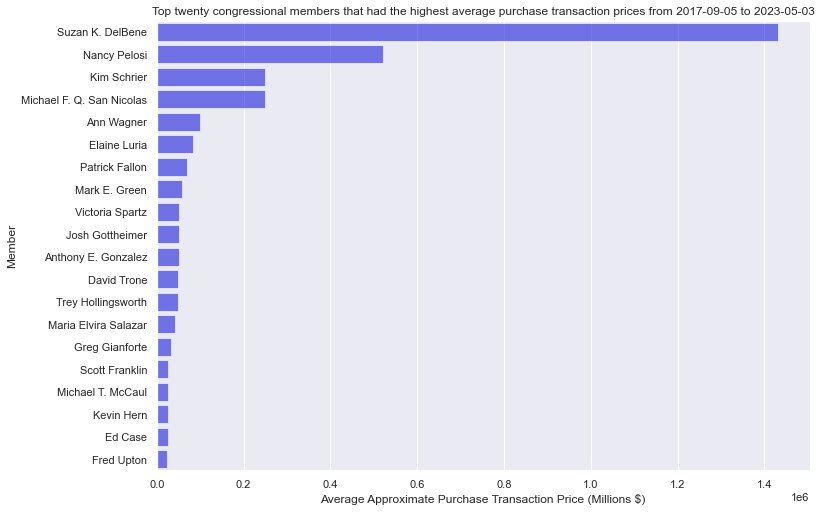

In [35]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'amount_formatted', y = 'member', data = top_ten_avg_purchase_transaction_price_by_member, color = 'Blue', alpha = 0.6)
plt.title('Top twenty congressional members that had the highest average purchase transaction prices from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Approximate Purchase Transaction Price (Millions $)')


### Average Approximate Sale Transaction Price by Member

In [36]:
avg_sale_transaction_price_by_member = transactions_two[transactions_two['type_higher_gran'] == 'Sale']
avg_sale_transaction_price_by_member = avg_sale_transaction_price_by_member[['member', 'amount_formatted']].groupby('member', as_index = False).agg(np.mean).sort_values('amount_formatted', ascending = False)
top_ten_avg_sale_transaction_price_by_member = avg_sale_transaction_price_by_member.iloc[0:20, :]
top_ten_avg_sale_transaction_price_by_member['amount_formatted'] = top_ten_avg_sale_transaction_price_by_member['amount_formatted'].astype(int)
top_ten_avg_sale_transaction_price_by_member


/var/folders/pm/4_sx8tgs6j91b49hvjnrs7cr0000gn/T/ipykernel_1021/4143517575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_ten_avg_sale_transaction_price_by_member['amount_formatted'] = top_ten_avg_sale_transaction_price_by_member['amount_formatted'].astype(int)


,member,amount_formatted
132,Suzan K. DelBene,2038888
105,Nancy Pelosi,389656
142,Trey Hollingsworth,250500
45,Elaine Luria,250000
62,Jamie Raskin,250000
96,Michael F. Q. San Nicolas,250000
121,Scott Franklin,233214
93,Mark E. Green,178147
143,Van Taylor,168758
144,Victoria Spartz,150000


Text(0.5, 0, 'Average Approximate Sale Transaction Price (Millions $)')

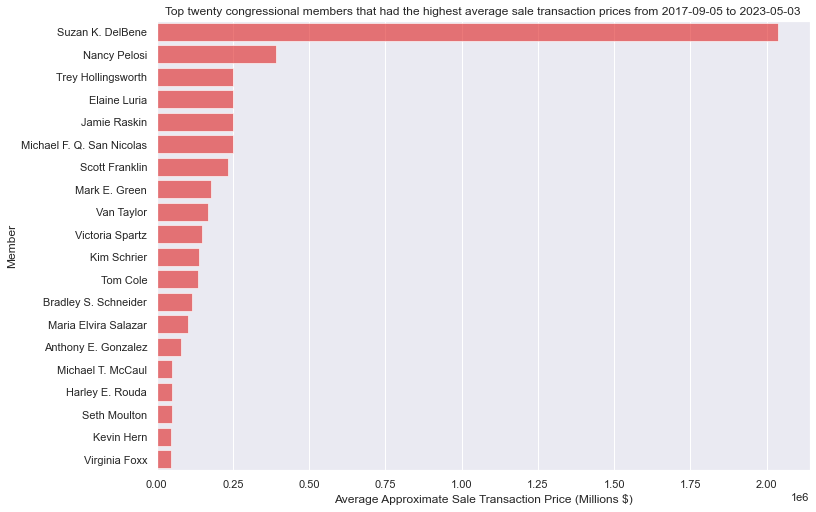

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'amount_formatted', y = 'member', data = top_ten_avg_sale_transaction_price_by_member, color = 'Red', alpha = 0.6)
plt.title('Top twenty congressional members that had the highest average sale transaction prices from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Approximate Sale Transaction Price (Millions $)')

### GAINED THE MOST ON AVERAGE. Average Approximate Sale Transaction Price by Member -  Average Approximate Purchase Transaction Price by Member. 

In [38]:
merged_avg_prices = avg_sale_transaction_price_by_member.merge(avg_purchase_transaction_price_by_member, how = 'inner', on = 'member')
merged_avg_prices['Average Approximate Net Gain'] = merged_avg_prices['amount_formatted_x'] - merged_avg_prices['amount_formatted_y']
merged_avg_prices_2 = merged_avg_prices.sort_values('Average Approximate Net Gain', ascending = False).iloc[0:20, :]
merged_avg_prices_2

,member,amount_formatted_x,amount_formatted_y,Average Approximate Net Gain
0,Suzan K. DelBene,2.038889e+06,1.432364e+06,606525.252525
5,Scott Franklin,2.332143e+05,2.664286e+04,206571.428571
2,Trey Hollingsworth,2.505000e+05,4.976190e+04,200738.095238
3,Elaine Luria,2.500000e+05,8.400000e+04,166000.000000
9,Tom Cole,1.362500e+05,1.000000e+03,135250.000000
6,Mark E. Green,1.781474e+05,5.918241e+04,118964.957998
7,Victoria Spartz,1.500000e+05,5.071429e+04,99285.714286
10,Maria Elvira Salazar,1.037500e+05,4.150000e+04,62250.000000
13,Harley E. Rouda,5.050000e+04,1.000000e+03,49500.000000
14,Seth Moulton,5.000000e+04,1.000000e+03,49000.000000


Text(0.5, 0, 'Average Monetary Gain (Millions $)')

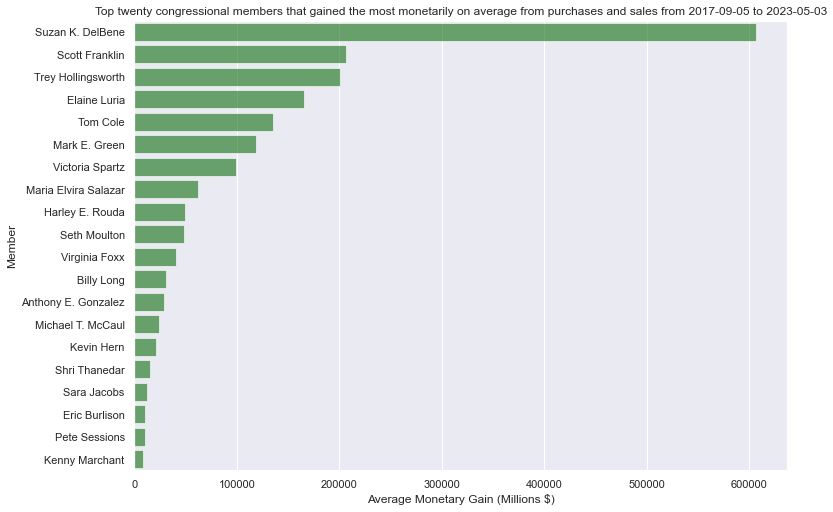

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Average Approximate Net Gain', y = 'member', data = merged_avg_prices_2, color = 'Green', alpha = 0.6)
plt.title('Top twenty congressional members that gained the most monetarily on average from purchases and sales from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Monetary Gain (Millions $)')


### LOST THE MOST ON AVERAGE. Average Approximate Sale Transaction Price by Member -  Average Approximate Purchase Transaction Price by Member. 

In [40]:
merged_avg_prices_3 = merged_avg_prices.sort_values('Average Approximate Net Gain', ascending = True).iloc[0:20, :]
merged_avg_prices_3

,member,amount_formatted_x,amount_formatted_y,Average Approximate Net Gain
1,Nancy Pelosi,389656.250000,521875.000000,-132218.750000
8,Kim Schrier,140000.000000,250333.333333,-110333.333333
22,Patrick Fallon,27361.702128,69269.230769,-41907.528642
63,Fred Upton,3545.454545,23142.857143,-19597.402597
19,Josh Gottheimer,33907.647908,50537.477148,-16629.829240
82,Steve Cohen,1333.333333,15000.000000,-13666.666667
97,Deborah K. Ross,1000.000000,12846.153846,-11846.153846
25,Ed Case,17333.333333,25500.000000,-8166.666667
106,Michael Patrick Guest,1000.000000,8000.000000,-7000.000000
35,K. Michael Conaway,13419.354839,20046.511628,-6627.156789


Text(0.5, 0, 'Average Monetary Loss (Millions $)')

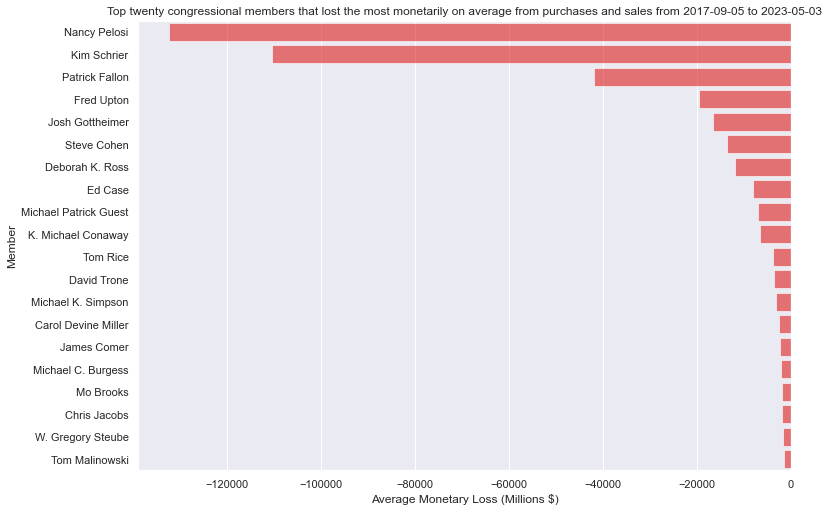

In [41]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Average Approximate Net Gain', y = 'member', data = merged_avg_prices_3, color = 'Red', alpha = 0.6)
plt.title('Top twenty congressional members that lost the most monetarily on average from purchases and sales from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Monetary Loss (Millions $)')


## Sector Level EDA

### Volume and Percentage % Breakdown of Transactions Count by Sector

In [42]:
volume_and_percentage_per_sector = transactions_two['sector'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Sector',
    'sector': 'Transactions Count'
})
volume_and_percentage_per_sector['Percentage % Composition'] = 100*volume_and_percentage_per_sector['Transactions Count']/volume_and_percentage_per_sector['Transactions Count'].sum()
volume_and_percentage_per_sector


,Sector,Transactions Count,Percentage % Composition
0,Technology,2285,19.761308
1,Health Care,1494,12.920522
2,Finance,1379,11.925971
3,Consumer Services,1275,11.026550
4,Energy,775,6.702413
5,Consumer Discretionary,739,6.391075
6,Capital Goods,696,6.019199
7,Public Utilities,621,5.370579
8,Consumer Non-Durables,485,4.194413
9,Miscellaneous,427,3.692813


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Health Care'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Consumer Services'),
  Text(4, 0, 'Energy'),
  Text(5, 0, 'Consumer Discretionary'),
  Text(6, 0, 'Capital Goods'),
  Text(7, 0, 'Public Utilities'),
  Text(8, 0, 'Consumer Non-Durables'),
  Text(9, 0, 'Miscellaneous'),
  Text(10, 0, 'Industrials'),
  Text(11, 0, 'Basic Industries'),
  Text(12, 0, 'Real Estate'),
  Text(13, 0, 'Transportation'),
  Text(14, 0, 'Consumer Durables'),
  Text(15, 0, 'Utilities'),
  Text(16, 0, 'Consumer Staples'),
  Text(17, 0, 'Telecommunications'),
  Text(18, 0, 'Basic Materials')])

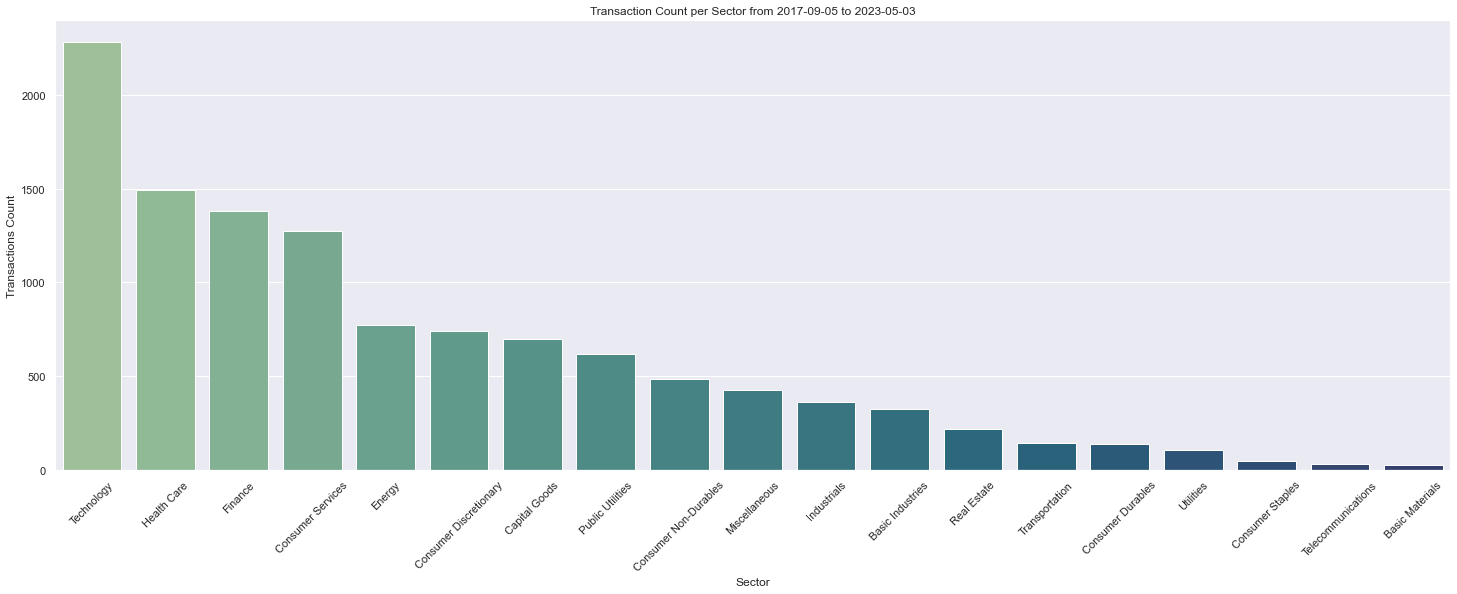

In [43]:
sns.set(rc={'figure.figsize':(25,8.27)})
sns.barplot(y = 'Transactions Count', x = 'Sector', data = volume_and_percentage_per_sector, palette = 'crest')
plt.title('Transaction Count per Sector from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)

### Volume and Percentage % Breakdown of Transactions Count by Transaction Type and Sector

In [44]:
volume_and_percentage_per_sector_and_ttype = transactions_two[['sector', 'type_higher_gran']]
volume_and_percentage_per_sector_and_ttype['Transactions Count'] = 1
volume_and_percentage_per_sector_and_ttype = volume_and_percentage_per_sector_and_ttype.groupby(['sector', 'type_higher_gran'], as_index = False)
volume_and_percentage_per_sector_and_ttype = volume_and_percentage_per_sector_and_ttype.agg(sum)
volume_and_percentage_per_sector_and_ttype = volume_and_percentage_per_sector_and_ttype.merge(volume_and_percentage_per_sector, how = 'inner', left_on = 'sector', right_on = 'Sector')
volume_and_percentage_per_sector_and_ttype = volume_and_percentage_per_sector_and_ttype.sort_values('Transactions Count_y', ascending = False). drop(columns = ['Transactions Count_y', 'Percentage % Composition'])
volume_and_percentage_per_sector_and_ttype = volume_and_percentage_per_sector_and_ttype.rename(columns = {
    'type_higher_gran': 'Transaction Type',
    'Transactions Count_x': 'Transactions Count'
})
volume_and_percentage_per_sector_and_ttype.head()


/var/folders/pm/4_sx8tgs6j91b49hvjnrs7cr0000gn/T/ipykernel_1021/1491246450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  volume_and_percentage_per_sector_and_ttype['Transactions Count'] = 1


,sector,Transaction Type,Transactions Count,Sector
31,Technology,Sale,1111,Technology
30,Technology,Purchase,1174,Technology
21,Health Care,Sale,735,Health Care
20,Health Care,Purchase,759,Health Care
18,Finance,Purchase,668,Finance


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Technology'),
  Text(1, 0, 'Health Care'),
  Text(2, 0, 'Finance'),
  Text(3, 0, 'Consumer Services'),
  Text(4, 0, 'Energy'),
  Text(5, 0, 'Consumer Discretionary'),
  Text(6, 0, 'Capital Goods'),
  Text(7, 0, 'Public Utilities'),
  Text(8, 0, 'Consumer Non-Durables'),
  Text(9, 0, 'Miscellaneous'),
  Text(10, 0, 'Industrials'),
  Text(11, 0, 'Basic Industries'),
  Text(12, 0, 'Real Estate'),
  Text(13, 0, 'Transportation'),
  Text(14, 0, 'Consumer Durables'),
  Text(15, 0, 'Utilities'),
  Text(16, 0, 'Consumer Staples'),
  Text(17, 0, 'Telecommunications'),
  Text(18, 0, 'Basic Materials')])

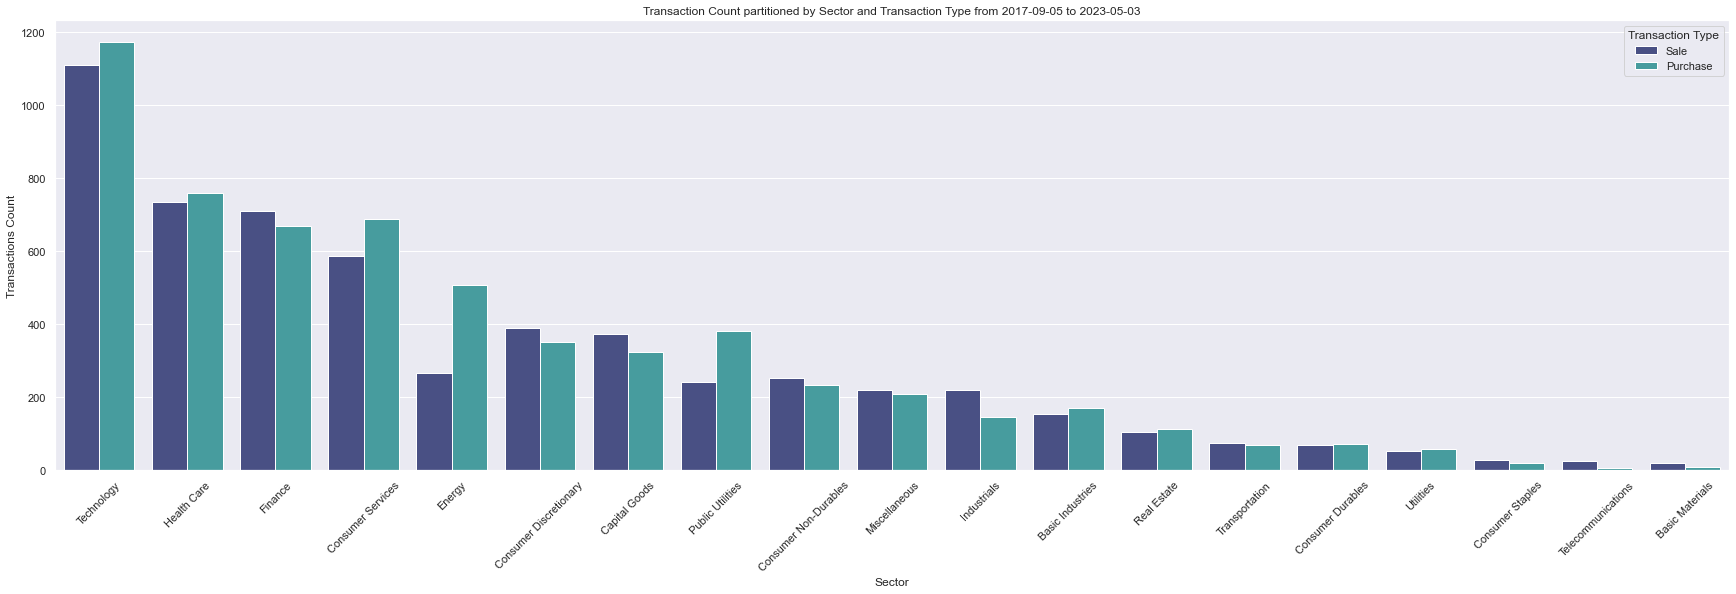

In [45]:
sns.set(rc={'figure.figsize':(30,8.27)})
sns.barplot(y = 'Transactions Count', 
            x = 'Sector',
            hue = 'Transaction Type',
            data = volume_and_percentage_per_sector_and_ttype,
            palette = 'mako', alpha = 1)
plt.title('Transaction Count partitioned by Sector and Transaction Type from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)

### Volume and Percentage % Breakdown of Purchases Count by Sector

In [46]:
purchases_volume_and_percentage_per_sector = transactions_two[transactions_two['type_higher_gran'] == 'Purchase']['sector'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Sector',
    'sector': 'Purchase Transactions Count'
})
purchases_volume_and_percentage_per_sector['Percentage % Composition'] = 100*purchases_volume_and_percentage_per_sector['Purchase Transactions Count']/purchases_volume_and_percentage_per_sector['Purchase Transactions Count'].sum()
purchases_volume_and_percentage_per_sector


,Sector,Purchase Transactions Count,Percentage % Composition
0,Technology,1174,19.747687
1,Health Care,759,12.767031
2,Consumer Services,688,11.572750
3,Finance,668,11.236333
4,Energy,508,8.544996
5,Public Utilities,381,6.408747
6,Consumer Discretionary,351,5.904121
7,Capital Goods,324,5.449958
8,Consumer Non-Durables,233,3.919260
9,Miscellaneous,209,3.515559


Text(0.5, 1.0, 'Purchase transaction volume per Sector from 2017-09-05 to 2023-05-03')

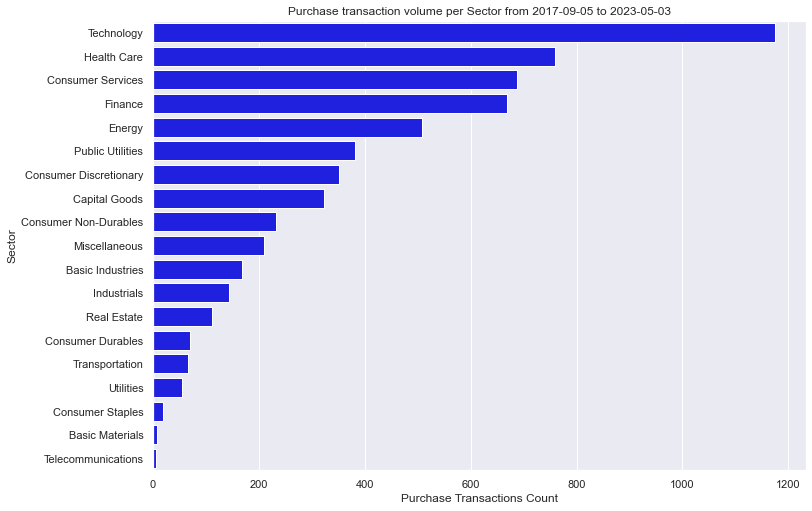

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Purchase Transactions Count', y = 'Sector', data = purchases_volume_and_percentage_per_sector, color = 'Blue')
plt.title('Purchase transaction volume per Sector from 2017-09-05 to 2023-05-03')


### Volume and Percentage % Breakdown of Sales Count by Sector

In [48]:
sales_volume_and_percentage_per_sector = transactions_two[transactions_two['type_higher_gran'] == 'Sale']['sector'].value_counts().to_frame().reset_index().rename(columns = {
    'index': 'Sector',
    'sector': 'Sale Transactions Count'
})
sales_volume_and_percentage_per_sector['Percentage % Composition'] = 100*sales_volume_and_percentage_per_sector['Sale Transactions Count']/sales_volume_and_percentage_per_sector['Sale Transactions Count'].sum()
sales_volume_and_percentage_per_sector


,Sector,Sale Transactions Count,Percentage % Composition
0,Technology,1111,19.775721
1,Health Care,735,13.082948
2,Finance,711,12.655749
3,Consumer Services,587,10.448558
4,Consumer Discretionary,388,6.906372
5,Capital Goods,372,6.621574
6,Energy,267,4.752581
7,Consumer Non-Durables,252,4.485582
8,Public Utilities,240,4.271983
9,Industrials,219,3.898184


Text(0.5, 1.0, 'Sale transaction volume per Sector from 2017-09-05 to 2023-05-03')

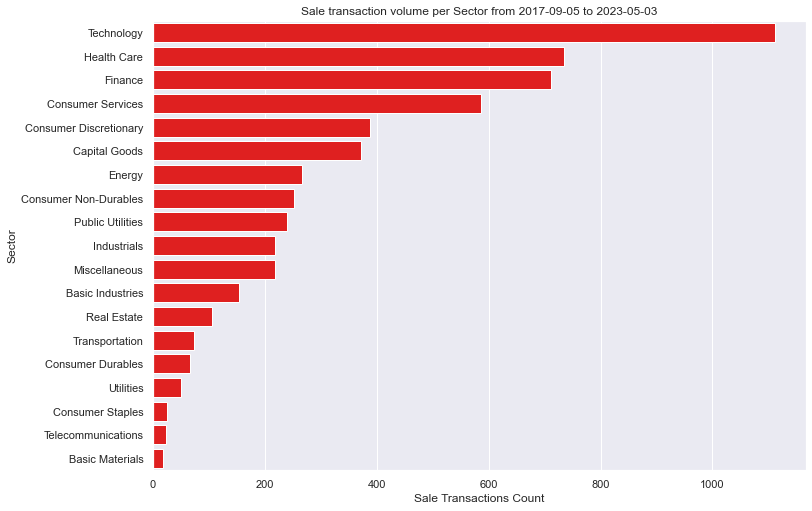

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Sale Transactions Count', y = 'Sector', data = sales_volume_and_percentage_per_sector, color = 'Red')
plt.title('Sale transaction volume per Sector from 2017-09-05 to 2023-05-03')


### Average Approximate Purchase Transaction Price of Members Linked to Sector Stocks

In [50]:
avg_purchase_transaction_price_by_sector = transactions_two[transactions_two['type_higher_gran'] == 'Purchase']
avg_purchase_transaction_price_by_sector = avg_purchase_transaction_price_by_sector[['sector', 'amount_formatted']].groupby('sector', as_index = False).agg(np.mean).sort_values('amount_formatted', ascending = False)
avg_purchase_transaction_price_by_sector['amount_formatted'] = avg_purchase_transaction_price_by_sector['amount_formatted'].astype(int)
avg_purchase_transaction_price_by_sector


,sector,amount_formatted
15,Technology,57155
8,Energy,24494
13,Public Utilities,24251
12,Miscellaneous,15248
2,Capital Goods,13330
6,Consumer Services,12292
4,Consumer Durables,11225
7,Consumer Staples,10210
9,Finance,10034
18,Utilities,9571


Text(0.5, 0, 'Average Approximate Purchase Transaction Price ($)')

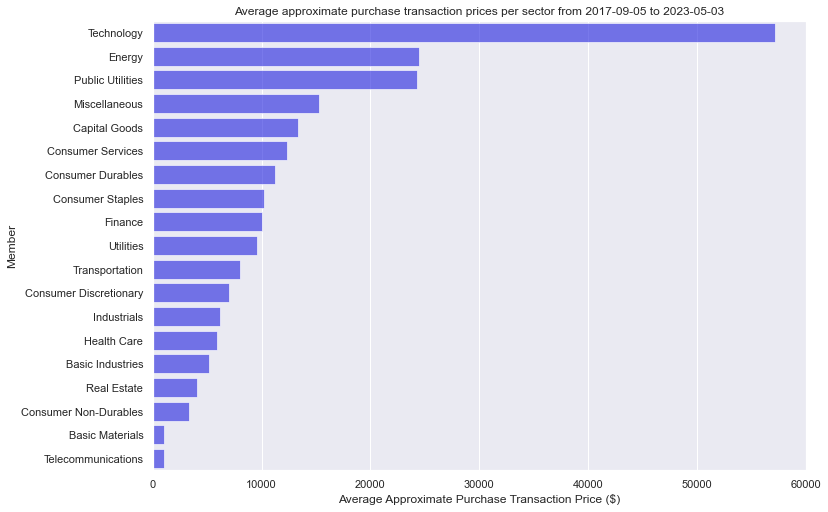

In [51]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'amount_formatted', y = 'sector', data = avg_purchase_transaction_price_by_sector, color = 'Blue', alpha = 0.6)
plt.title('Average approximate purchase transaction prices per sector from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Approximate Purchase Transaction Price ($)')


### Average Approximate Sale Transaction Price of Members Linked to Sector Stocks

In [52]:
avg_sale_transaction_price_by_sector = transactions_two[transactions_two['type_higher_gran'] == 'Sale']
avg_sale_transaction_price_by_sector = avg_sale_transaction_price_by_sector[['sector', 'amount_formatted']].groupby('sector', as_index = False).agg(np.mean).sort_values('amount_formatted', ascending = False)
avg_sale_transaction_price_by_sector['amount_formatted'] = avg_sale_transaction_price_by_sector['amount_formatted'].astype(int)
avg_sale_transaction_price_by_sector


,sector,amount_formatted
15,Technology,53623
8,Energy,46516
13,Public Utilities,35366
12,Miscellaneous,22059
9,Finance,16812
18,Utilities,15176
4,Consumer Durables,9731
10,Health Care,9628
14,Real Estate,9600
2,Capital Goods,9526


Text(0.5, 0, 'Average Approximate Sale Transaction Price ($)')

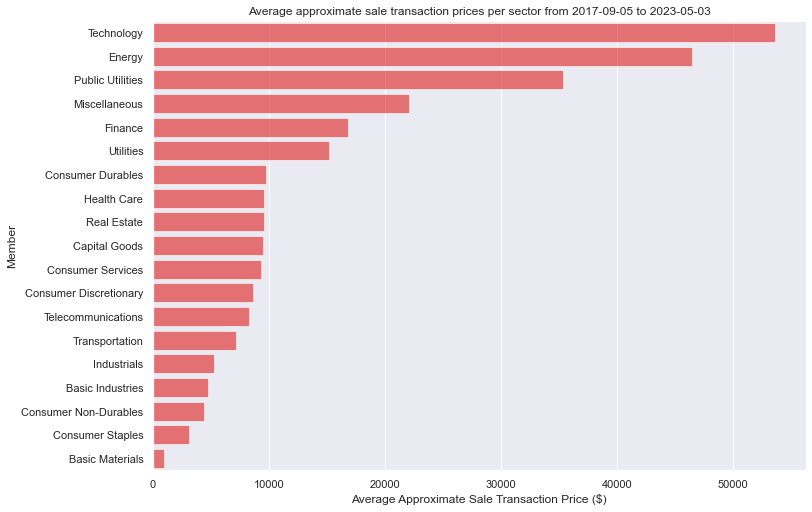

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'amount_formatted', y = 'sector', data = avg_sale_transaction_price_by_sector, color = 'Red', alpha = 0.6)
plt.title('Average approximate sale transaction prices per sector from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Average Approximate Sale Transaction Price ($)')


### Average Approximate Sale Transaction Price by Sector -  Average Approximate Purchase Transaction Price by Sector. 

In [54]:
merged_avg_prices = avg_sale_transaction_price_by_sector.merge(avg_purchase_transaction_price_by_sector, how = 'inner', on = 'sector')
merged_avg_prices['Average Approximate Net Gain'] = merged_avg_prices['amount_formatted_x'] - merged_avg_prices['amount_formatted_y']
merged_avg_prices_2 = merged_avg_prices.sort_values('Average Approximate Net Gain', ascending = False).iloc[0:20, :]
merged_avg_prices_2

,sector,amount_formatted_x,amount_formatted_y,Average Approximate Net Gain
1,Energy,46516,24494,22022
2,Public Utilities,35366,24251,11115
12,Telecommunications,8304,1000,7304
3,Miscellaneous,22059,15248,6811
4,Finance,16812,10034,6778
5,Utilities,15176,9571,5605
8,Real Estate,9600,4027,5573
7,Health Care,9628,5857,3771
11,Consumer Discretionary,8664,7014,1650
16,Consumer Non-Durables,4452,3283,1169


Text(0.5, 0, 'Average Monetary Gain')

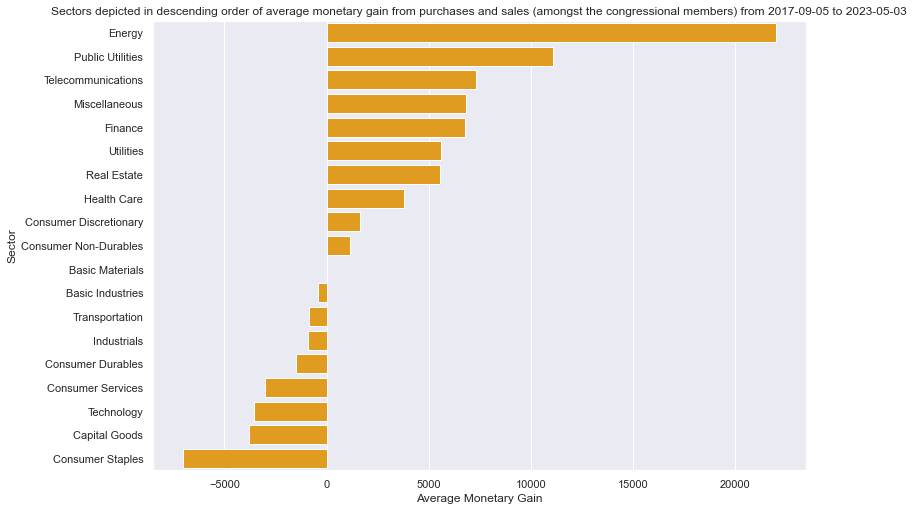

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Average Approximate Net Gain', y = 'sector', data = merged_avg_prices_2, color = 'Orange', alpha = 1)
plt.title('Sectors depicted in descending order of average monetary gain from purchases and sales (amongst the congressional members) from 2017-09-05 to 2023-05-03')
plt.ylabel('Sector')
plt.xlabel('Average Monetary Gain')


## EDA: Gain Likelihood
### The gain likelihoods are derived from the transactions data

In [56]:
transactions_two.head()

,disclosure_date,transaction_date,owner,member,member_type,amount_formatted,type,ticker,industry,sector,...,comment,adjusted,market.cap,country,ipo.year,short_term.avg_per_change,short_term.sd_per_change,med_term.avg_per_change,med_term.sd_per_change,type_higher_gran
0,2023-05-10,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745,Purchase
1,2023-05-10,2023-05-03,dependent,Victoria Spartz,representative,1000.0,purchase,SPG,Real Estate Investment Trusts,Consumer Services,...,NaN,104.086815,3.654159e+10,United States,NaN,-0.058235,0.027324,0.037727,0.044745,Purchase
2,2023-05-07,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,sale_full,CSCO,Computer Communications Equipment,Technology,...,NaN,46.229439,2.172187e+11,United States,1990.0,0.000536,0.030787,0.098959,0.041097,Sale
3,2023-05-07,2023-04-20,NaN,Robert J. Wittman,representative,1000.0,purchase,XOM,Oil & Gas Production,Energy,...,NaN,113.713020,4.601270e+11,United States,NaN,-0.078681,0.020198,-0.077247,0.022886,Purchase
4,2023-05-12,2023-04-20,joint,Susie Lee,representative,15000.0,sale_full,AJG,Specialty Insurers,Finance,...,NaN,206.815323,5.023014e+10,United States,NaN,0.036098,0.029300,0.061753,0.033477,Sale


In [64]:
(transactions_two['short_term.avg_per_change'].astype(float) > 0).sum()

7131

### Calculate the short term gain indicator and medium term gain indicators

In [71]:
transactions_two['short_term_gain_indicator'] = (transactions_two['short_term.avg_per_change'].astype(float) > 0).apply(lambda x: 1 if x is True else 0)
transactions_two['med_term_gain_indicator'] = (transactions_two['med_term.avg_per_change'].astype(float) > 0).apply(lambda x: 1 if x is True else 0)


In [72]:
transactions_two['short_term_gain_indicator'].value_counts()

1    7131
0    5169
Name: short_term_gain_indicator, dtype: int64

In [73]:
transactions_two['med_term_gain_indicator'].value_counts()

1    7887
0    4413
Name: med_term_gain_indicator, dtype: int64

### Filter to only purchases 

In [74]:
gain_likelihoods = transactions_two[transactions_two['type_higher_gran'] == 'Purchase']
gain_likelihoods['short_term_gain_indicator'].value_counts()

1    3671
0    2631
Name: short_term_gain_indicator, dtype: int64

### Create dataframe that vertically stacks short term gain indicators and medium term indicators

In [78]:
short_term_stacked = gain_likelihoods[['member', 'industry', 'sector', 'short_term_gain_indicator']].rename(columns = {
    'short_term_gain_indicator': 'Indicator'
})
short_term_stacked['Short/Medium Term'] = 'Short' 

medium_term_stacked = gain_likelihoods[['member', 'industry', 'sector', 'med_term_gain_indicator']].rename(columns = {
    'med_term_gain_indicator': 'Indicator'
})
medium_term_stacked['Short/Medium Term'] = 'Medium' 

gain_likelihoods_stacked = pd.concat([short_term_stacked, medium_term_stacked])
gain_likelihoods_stacked

,member,industry,sector,Indicator,Short/Medium Term
0,Victoria Spartz,Real Estate Investment Trusts,Consumer Services,0,Short
1,Victoria Spartz,Real Estate Investment Trusts,Consumer Services,0,Short
3,Robert J. Wittman,Oil & Gas Production,Energy,0,Short
7,Robert E. Latta,Savings Institutions,Finance,0,Short
8,Doug Lamborn,Electronic Components,Technology,0,Short
...,...,...,...,...,...
12293,Thomas Suozzi,Semiconductors,Technology,1,Medium
12294,Thomas Suozzi,Environmental Services,Public Utilities,1,Medium
12297,Thomas Suozzi,Aerospace,Capital Goods,1,Medium
12298,Thomas Suozzi,Construction/Ag Equipment/Trucks,Capital Goods,1,Medium


### Short Term Gain Likelihood partitioned by Top Twenty Members That Made Most Purchase Transactions

In [86]:
gain_likelihood_by_member = gain_likelihoods_stacked[['member', 'Short/Medium Term', 'Indicator']].groupby(['member', 'Short/Medium Term'], as_index = False).agg(np.mean)
gain_likelihood_by_member['Indicator'] *= 100
gain_likelihood_by_member_top_twenty = gain_likelihood_by_member.merge(top_ten_per_members_purchases, how = 'inner', left_on = 'member', right_on = "Member")
gain_likelihood_by_member_top_twenty

,member,Short/Medium Term,Indicator,Member,Purchase Transactions Count,Percentage % Composition
0,Alan S. Lowenthal,Medium,78.142077,Alan S. Lowenthal,183,2.903840
1,Alan S. Lowenthal,Short,68.852459,Alan S. Lowenthal,183,2.903840
2,Cynthia Axne,Medium,68.644068,Cynthia Axne,118,1.872421
3,Cynthia Axne,Short,69.491525,Cynthia Axne,118,1.872421
4,Dean Phillips,Medium,75.233645,Dean Phillips,214,3.395747
5,Dean Phillips,Short,66.822430,Dean Phillips,214,3.395747
6,"Donald S. Beyer, Jr.",Medium,62.814070,"Donald S. Beyer, Jr.",199,3.157728
7,"Donald S. Beyer, Jr.",Short,56.783920,"Donald S. Beyer, Jr.",199,3.157728
8,Donna Shalala,Medium,52.586207,Donna Shalala,116,1.840685
9,Donna Shalala,Short,59.482759,Donna Shalala,116,1.840685


### Average short term gain % rate amongst members

In [103]:
np.mean(gain_likelihood_by_member[gain_likelihood_by_member['Short/Medium Term'] == 'Short']['Indicator'])

53.99370271005282

### Average medium term gain % rate amongst members

In [104]:
np.mean(gain_likelihood_by_member[gain_likelihood_by_member['Short/Medium Term'] == 'Medium']['Indicator'])

62.418883699076275

### Short Term Gain Likelihood partitioned by Top Twenty Members That Made Most Purchase Transactions

Text(0.5, 0, 'Short term gain % rate')

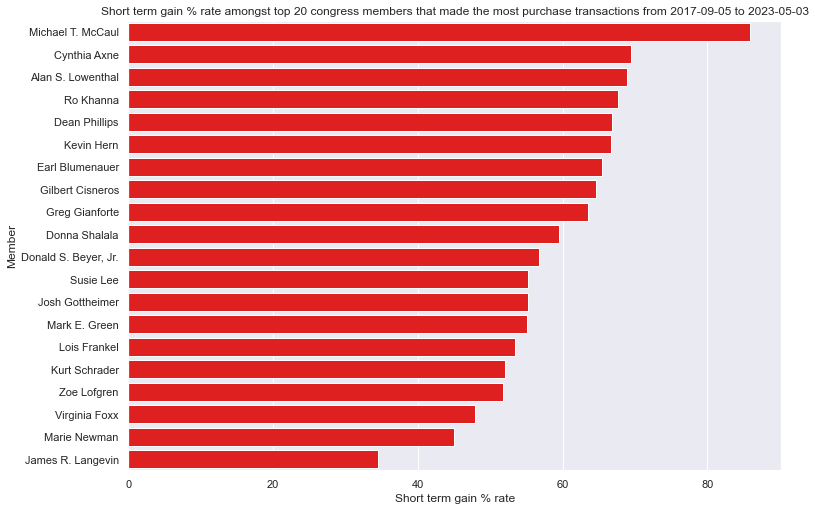

In [177]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Indicator', 
            y = 'member',
            data = gain_likelihood_by_member_top_twenty[gain_likelihood_by_member_top_twenty['Short/Medium Term'] == 'Short'].sort_values('Indicator', ascending = False).iloc[0:20, :],
            color = 'Red', alpha = 1)

plt.title('Short term gain % rate amongst top 20 congress members that made the most purchase transactions from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Short term gain % rate')




### Medium Term Gain Likelihood partitioned by Top Twenty Members That Made Most Purchase Transactions

Text(0.5, 0, 'Medium term gain % rate')

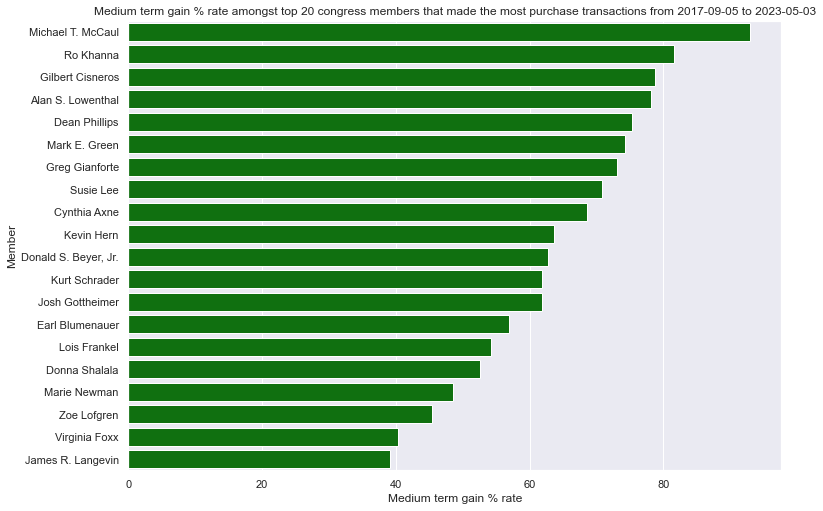

In [176]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Indicator', 
            y = 'member',
            data = gain_likelihood_by_member_top_twenty[gain_likelihood_by_member_top_twenty['Short/Medium Term'] == 'Medium'].sort_values('Indicator', ascending = False).iloc[0:20, :],
            color = 'Green', alpha = 1)

plt.title('Medium term gain % rate amongst top 20 congress members that made the most purchase transactions from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Medium term gain % rate')



### Short-Term Gain Likelihood partitioned by Sector

In [121]:
gain_likelihood_by_sector = gain_likelihoods_stacked[['sector', 'Short/Medium Term', 'Indicator']].groupby(['sector', 'Short/Medium Term'], as_index = False).agg(np.mean)
gain_likelihood_by_sector['Indicator'] *= 100
gain_likelihood_by_sector_st = gain_likelihood_by_sector[gain_likelihood_by_sector['Short/Medium Term'] == 'Short']
gain_likelihood_by_sector_st = gain_likelihood_by_sector_st.sort_values('Indicator', ascending = False)
gain_likelihood_by_sector_st

,sector,Short/Medium Term,Indicator
3,Basic Materials,Short,85.714286
23,Industrials,Short,68.750000
33,Telecommunications,Short,66.666667
11,Consumer Non-Durables,Short,62.231760
25,Miscellaneous,Short,61.722488
27,Public Utilities,Short,61.417323
5,Capital Goods,Short,61.111111
29,Real Estate,Short,60.360360
21,Health Care,Short,59.683794
19,Finance,Short,59.431138


Text(0, 0.5, 'Sector')

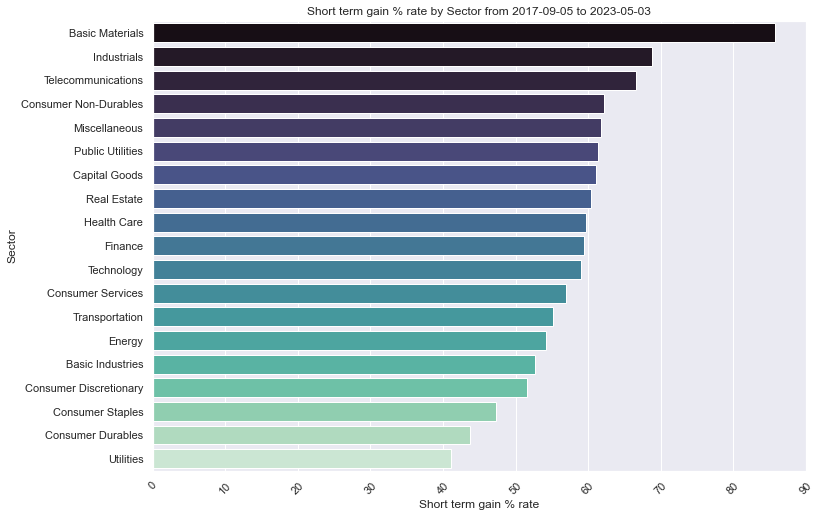

In [135]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Indicator', y = 'sector', data = gain_likelihood_by_sector_st, palette = 'mako')
plt.title('Short term gain % rate by Sector from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)
plt.xlabel('Short term gain % rate')
plt.ylabel('Sector')

### Medium-Term Gain Likelihood partitioned by Sector

In [136]:
gain_likelihood_by_sector = gain_likelihoods_stacked[['sector', 'Short/Medium Term', 'Indicator']].groupby(['sector', 'Short/Medium Term'], as_index = False).agg(np.mean)
gain_likelihood_by_sector['Indicator'] *= 100
gain_likelihood_by_sector_mt = gain_likelihood_by_sector[gain_likelihood_by_sector['Short/Medium Term'] == 'Medium']
gain_likelihood_by_sector_mt = gain_likelihood_by_sector_mt.sort_values('Indicator', ascending = False)
gain_likelihood_by_sector_mt

,sector,Short/Medium Term,Indicator
22,Industrials,Medium,70.138889
26,Public Utilities,Medium,68.766404
12,Consumer Services,Medium,68.459302
10,Consumer Non-Durables,Medium,68.240343
30,Technology,Medium,67.120954
4,Capital Goods,Medium,66.358025
18,Finance,Medium,65.119760
20,Health Care,Medium,64.558630
14,Consumer Staples,Medium,63.157895
16,Energy,Medium,62.795276


Text(0, 0.5, 'Sector')

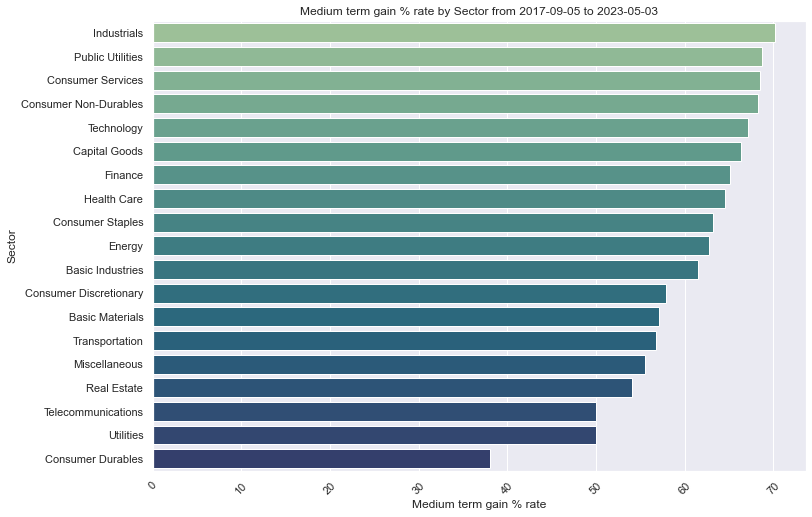

In [138]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Indicator', y = 'sector', data = gain_likelihood_by_sector_mt, palette = 'crest')
plt.title('Medium term gain % rate by Sector from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)
plt.xlabel('Medium term gain % rate')
plt.ylabel('Sector')

## EDA: Short Term and Medium Term Average Percentage % Gain
### The short term and medium term average percentage % gains are derived from the transactions data

### Create a dataframe that stacks the average short term percentage % gain and the average medium term percentage % gain

In [149]:
short_term_stacked = gain_likelihoods[['member', 'industry', 'sector', 'short_term.avg_per_change']].rename(columns = {
    'short_term.avg_per_change': 'Term Average Percentage % Change'
})
short_term_stacked['Short/Medium Term'] = 'Short' 

medium_term_stacked = gain_likelihoods[['member', 'industry', 'sector', 'med_term.avg_per_change']].rename(columns = {
    'med_term.avg_per_change': 'Term Average Percentage % Change'
})
medium_term_stacked['Short/Medium Term'] = 'Medium' 

average_gains_stacked = pd.concat([short_term_stacked, medium_term_stacked])
average_gains_stacked

,member,industry,sector,Term Average Percentage % Change,Short/Medium Term
0,Victoria Spartz,Real Estate Investment Trusts,Consumer Services,-0.058235,Short
1,Victoria Spartz,Real Estate Investment Trusts,Consumer Services,-0.058235,Short
3,Robert J. Wittman,Oil & Gas Production,Energy,-0.078681,Short
7,Robert E. Latta,Savings Institutions,Finance,-0.169855,Short
8,Doug Lamborn,Electronic Components,Technology,-0.036596,Short
...,...,...,...,...,...
12293,Thomas Suozzi,Semiconductors,Technology,0.058250,Medium
12294,Thomas Suozzi,Environmental Services,Public Utilities,0.106668,Medium
12297,Thomas Suozzi,Aerospace,Capital Goods,0.041215,Medium
12298,Thomas Suozzi,Construction/Ag Equipment/Trucks,Capital Goods,0.062893,Medium


### Short Term Average Percentage % Gain partitioned by Top Twenty Members That Made Most Purchase Transactions

In [152]:
avg_gain_by_member = average_gains_stacked[['member', 'Short/Medium Term', 'Term Average Percentage % Change']].groupby(['member', 'Short/Medium Term'], as_index = False).agg(np.mean)
avg_gain_by_member['Term Average Percentage % Change'] *= 100
avg_gain_by_member_top_twenty = avg_gain_by_member.merge(top_ten_per_members_purchases, how = 'inner', left_on = 'member', right_on = "Member")
avg_gain_by_member_top_twenty.head()


,member,Short/Medium Term,Term Average Percentage % Change,Member,Purchase Transactions Count,Percentage % Composition
0,Alan S. Lowenthal,Medium,28.692027,Alan S. Lowenthal,183,2.903840
1,Alan S. Lowenthal,Short,4.382078,Alan S. Lowenthal,183,2.903840
2,Cynthia Axne,Medium,7.125356,Cynthia Axne,118,1.872421
3,Cynthia Axne,Short,2.302675,Cynthia Axne,118,1.872421
4,Dean Phillips,Medium,18.866726,Dean Phillips,214,3.395747


Text(0.5, 0, 'Short term average percentage % gain')

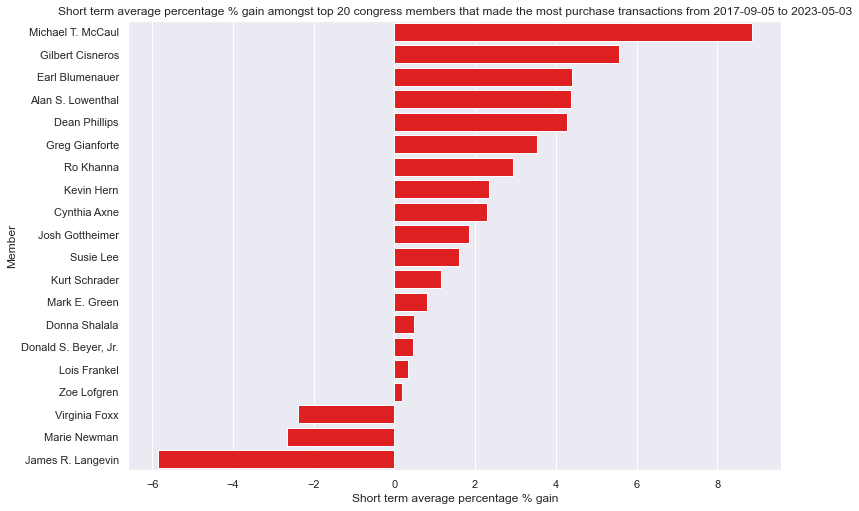

In [175]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Term Average Percentage % Change', 
            y = 'member',
            data = avg_gain_by_member_top_twenty[avg_gain_by_member_top_twenty['Short/Medium Term'] == 'Short'].sort_values('Term Average Percentage % Change', ascending = False).iloc[0:20, :],
            color = 'Red', alpha = 1)

plt.title('Short term average percentage % gain amongst top 20 congress members that made the most purchase transactions from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Short term average percentage % gain')



### Top 20 - Short Term Average Percentage % Gain Overall

Text(0.5, 0, 'Short term average percentage % gain')

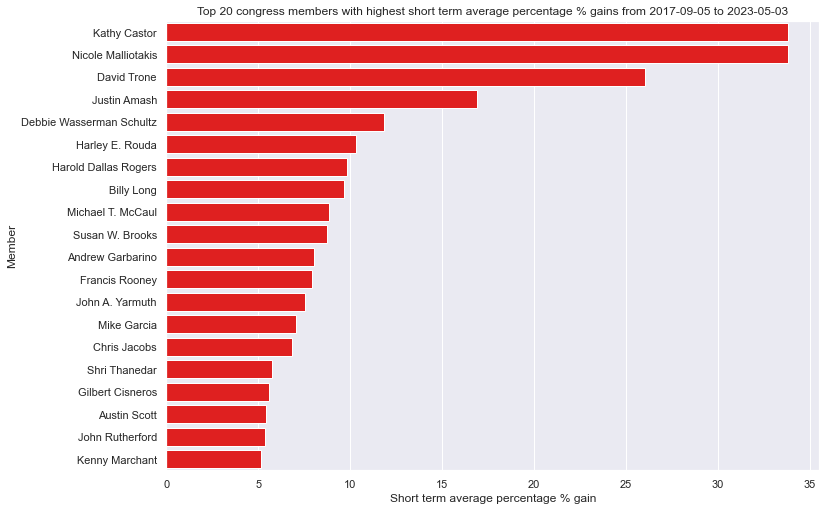

In [174]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Term Average Percentage % Change', 
            y = 'member',
            data = avg_gain_by_member[avg_gain_by_member['Short/Medium Term'] == 'Short'].sort_values('Term Average Percentage % Change', ascending = False).iloc[0:20, :],
            color = 'Red', alpha = 1)

plt.title('Top 20 congress members with highest short term average percentage % gains from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Short term average percentage % gain')



### Medium Term Average Percentage % Gain partitioned by Top Twenty Members That Made Most Purchase Transactions

Text(0.5, 0, 'Medium term average percentage % gain')

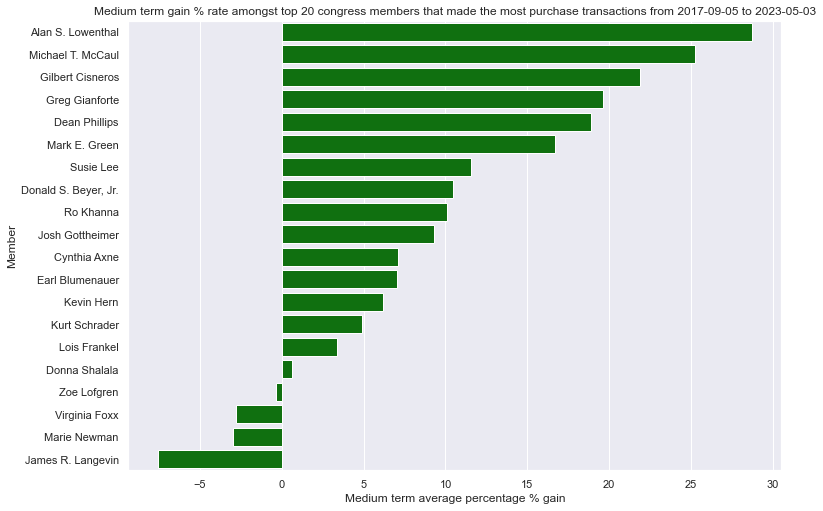

In [173]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
        
sns.barplot(x = 'Term Average Percentage % Change', 
            y = 'member',
            data = avg_gain_by_member_top_twenty[avg_gain_by_member_top_twenty['Short/Medium Term'] == 'Medium'].sort_values('Term Average Percentage % Change', ascending = False).iloc[0:20, :],
            color = 'Green', alpha = 1)

plt.title('Medium term gain % rate amongst top 20 congress members that made the most purchase transactions from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Medium term average percentage % gain')



### Top 20 - Medium Term Average Percentage % Gain Overall

Text(0.5, 0, 'Medium term average percentage % gain')

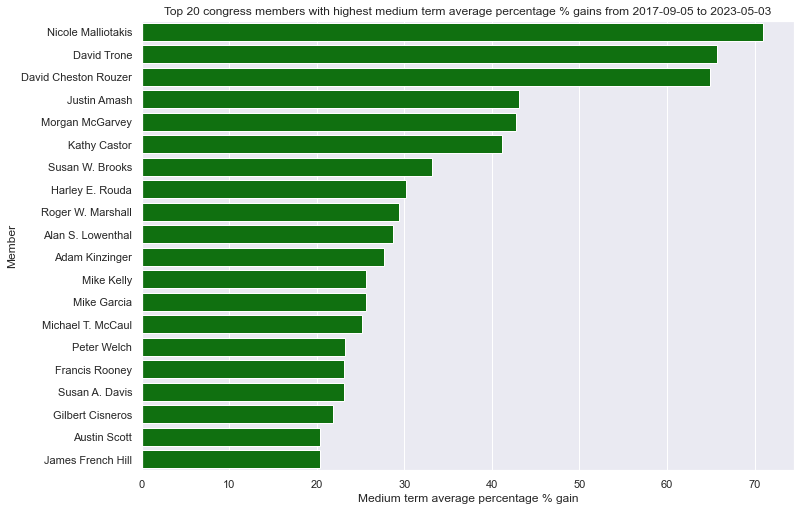

In [172]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Term Average Percentage % Change', 
            y = 'member',
            data = avg_gain_by_member[avg_gain_by_member['Short/Medium Term'] == 'Medium'].sort_values('Term Average Percentage % Change', ascending = False).iloc[0:20, :],
            color = 'Green', alpha = 1)

plt.title('Top 20 congress members with highest medium term average percentage % gains from 2017-09-05 to 2023-05-03')
plt.ylabel('Member')
plt.xlabel('Medium term average percentage % gain')



### Short-Term Average Percentage % Gain partitioned by Sector

In [164]:
avg_gain_by_sector = average_gains_stacked[['sector', 'Short/Medium Term', 'Term Average Percentage % Change']].groupby(['sector', 'Short/Medium Term'], as_index = False).agg(np.mean)
avg_gain_by_sector['Term Average Percentage % Change'] *= 100
avg_gain_by_sector_st = avg_gain_by_sector[avg_gain_by_sector['Short/Medium Term'] == 'Short']
avg_gain_by_sector_st = avg_gain_by_sector_st.sort_values('Term Average Percentage % Change', ascending = False)
avg_gain_by_sector_st


,sector,Short/Medium Term,Term Average Percentage % Change
23,Industrials,Short,5.288440
3,Basic Materials,Short,4.630095
21,Health Care,Short,2.688194
31,Technology,Short,2.466846
5,Capital Goods,Short,2.398714
29,Real Estate,Short,1.984420
27,Public Utilities,Short,1.904294
19,Finance,Short,1.543052
11,Consumer Non-Durables,Short,1.540813
35,Transportation,Short,1.516770


Text(0, 0.5, 'Sector')

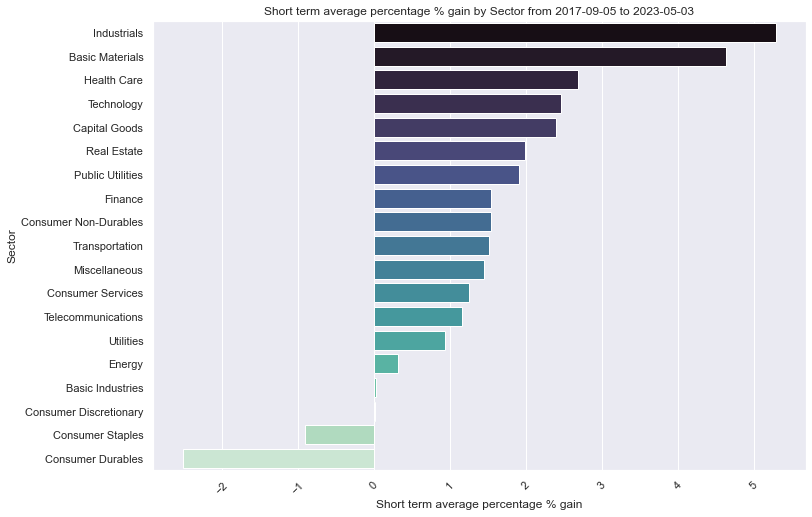

In [167]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Term Average Percentage % Change', y = 'sector', data = avg_gain_by_sector_st, palette = 'mako')
plt.title('Short term average percentage % gain by Sector from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)
plt.xlabel('Short term average percentage % gain')
plt.ylabel('Sector')

### Medium-Term Average Percentage % Gain partitioned by Sector

In [166]:
avg_gain_by_sector_mt = avg_gain_by_sector[avg_gain_by_sector['Short/Medium Term'] == 'Medium']
avg_gain_by_sector_mt = avg_gain_by_sector_mt.sort_values('Term Average Percentage % Change', ascending = False)
avg_gain_by_sector_mt


,sector,Short/Medium Term,Term Average Percentage % Change
22,Industrials,Medium,32.825775
30,Technology,Medium,12.552114
36,Utilities,Medium,9.791853
26,Public Utilities,Medium,9.748410
4,Capital Goods,Medium,9.730689
20,Health Care,Medium,8.892704
12,Consumer Services,Medium,8.259434
18,Finance,Medium,8.235235
6,Consumer Discretionary,Medium,7.834275
10,Consumer Non-Durables,Medium,6.712786


Text(0, 0.5, 'Sector')

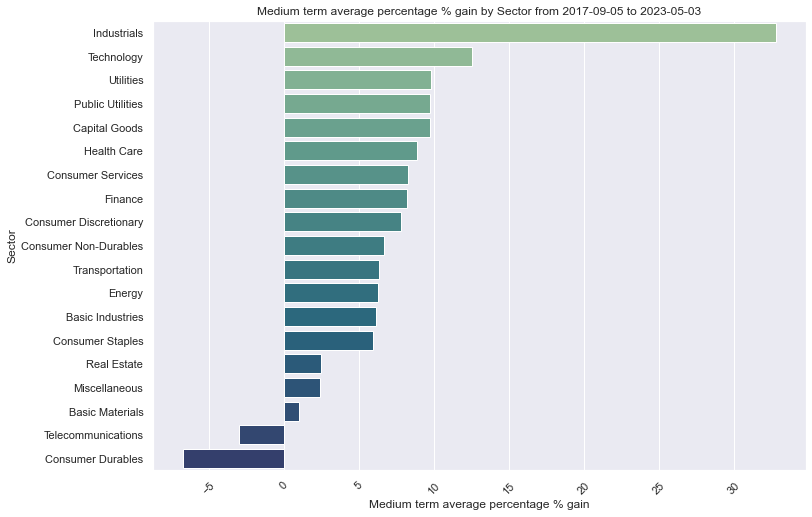

In [171]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = 'Term Average Percentage % Change', y = 'sector', data = avg_gain_by_sector_mt, palette = 'crest')
plt.title('Medium term average percentage % gain by Sector from 2017-09-05 to 2023-05-03')
plt.xticks(rotation = 45)
plt.xlabel('Medium term average percentage % gain')
plt.ylabel('Sector')